## Image Classification with CNN

In [1]:
import numpy as np 
import cv2 as cv

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Dense

## Data import

In [4]:
(tr_img,tr_labels),(testing_img,testing_labels)=datasets.cifar10.load_data()

In [5]:
tr_img.shape

(50000, 32, 32, 3)

In [6]:
tr_labels.shape

(50000, 1)

In [7]:
tr_labels[0]

array([6], dtype=uint8)

In [8]:
testing_img.shape

(10000, 32, 32, 3)

In [9]:
testing_labels.shape

(10000, 1)

## Scaling the intensity of the imagesdown between 0 and 1 

In [10]:
tr_img_scaled,testing_img_scaled=tr_img/255,testing_img/255

In [11]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [12]:
tr_labels[0][0]

6

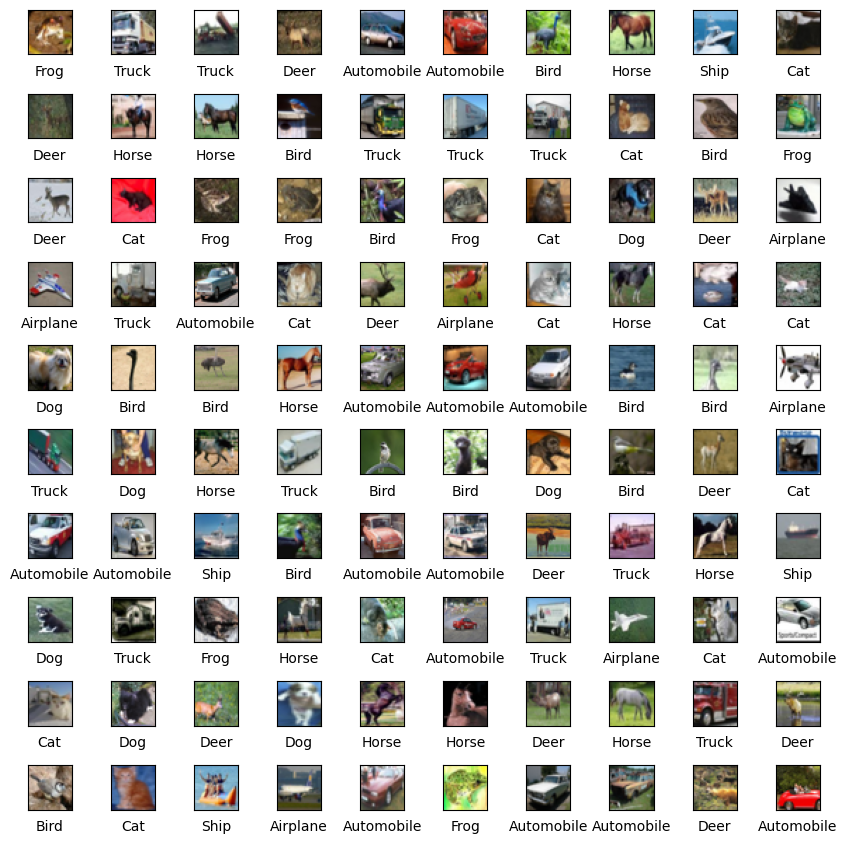

In [13]:
plt.figure(figsize=(10,10))

for i in range(100):
    plt.subplot(10,10,i + 1)
    plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.6,hspace=0.9)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(tr_img[i])
    plt.xlabel(class_names[tr_labels[i][0]])
plt.show()

In [14]:
tr_img_scaled[10]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

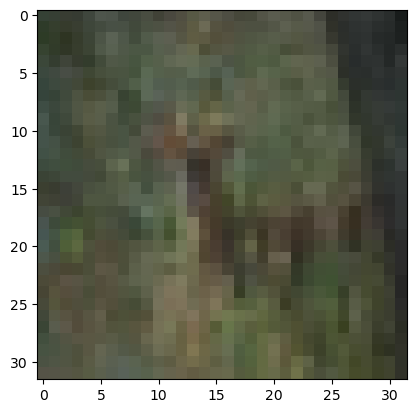

In [15]:
plt.imshow(tr_img_scaled[10])

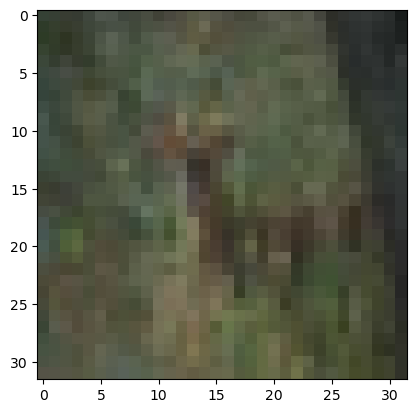

In [16]:
plt.imshow(tr_img[10])

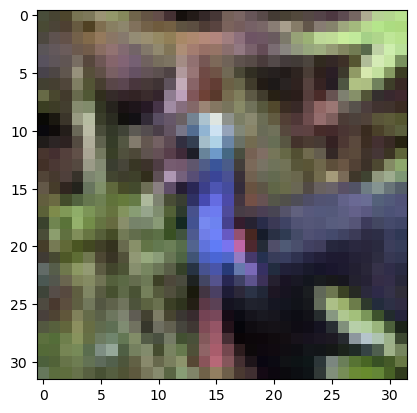

In [17]:
plt.imshow(tr_img_scaled[24])

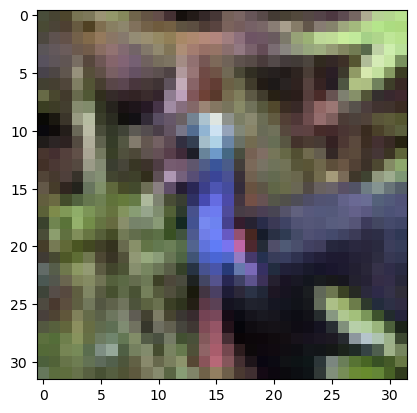

In [18]:
plt.imshow(tr_img[24])

## Creating model

In [19]:
model=models.Sequential()

In [20]:
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))

In [21]:
model.add(MaxPooling2D(2,2))

In [22]:
model.add(Conv2D(64,(3,3),activation='relu'))

In [23]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [24]:
model.add(Conv2D(64,(3,3),activation='relu'))

In [25]:
model.add(layers.Flatten())

In [26]:
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [27]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
model.fit(tr_img_scaled,tr_labels,epochs=10, validation_data=(testing_img_scaled,testing_labels))

Epoch 1/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.5447 - accuracy: 0.4375 - val_loss: 1.2968 - val_accuracy: 0.5235
Epoch 2/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.1672 - accuracy: 0.5885 - val_loss: 1.0691 - val_accuracy: 0.6204
Epoch 3/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1.0114 - accuracy: 0.6453 - val_loss: 1.0119 - val_accuracy: 0.6410
Epoch 4/10
1563/1563 [==============================] - 26s 16ms/step - loss: 0.9124 - accuracy: 0.6820 - val_loss: 0.9698 - val_accuracy: 0.6574
Epoch 5/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8405 - accuracy: 0.7052 - val_loss: 0.9827 - val_accuracy: 0.6593
Epoch 6/10
1563/1563 [==============================] - 26s 16ms/step - loss: 0.7793 - accuracy: 0.7287 - val_loss: 0.9141 - val_accuracy: 0.6858
Epoch 7/10
1563/1563 [==============================] - 26s 16ms/step - loss: 0.7268 - accuracy: 0.7449 - val_loss: 0.9290 -

In [29]:
loss,accuracy=model.evaluate(testing_img_scaled,testing_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.9479 - accuracy: 0.6973


In [30]:
print('loss=',loss)

loss= 0.947907030582428


In [31]:
print('accuracy=',accuracy)

accuracy= 0.6973000168800354


## Picking the model

In [32]:
model.save("Image_classification")

INFO:tensorflow:Assets written to: Image_classification\assets


INFO:tensorflow:Assets written to: Image_classification\assets


In [33]:
model=models.load_model('Image_classification')

In [34]:
import pickle
pickle.dump(model,open('img_class.pkl','wb'))

## Opening the saved model

In [35]:
pickled_model=pickle.load(open('img_class.pkl','rb'))

In [36]:
img_test1=cv.imread("C:/Users/Shruti/Downloads/Bird.jpg")

In [37]:
img_test1

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

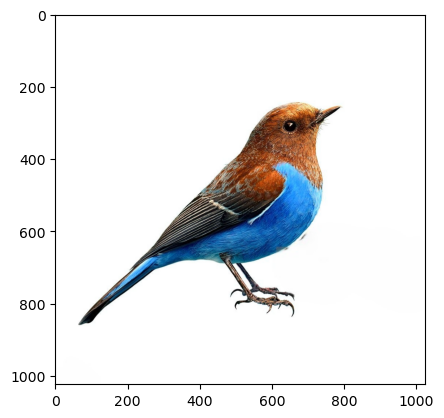

In [38]:
plt.imshow(img_test1)

## Prediction

In [39]:
img_test1=cv.cvtColor(img_test1,cv.COLOR_BGR2RGB)

In [40]:
img_test1_resized = cv.resize(img_test1, (32, 32))
img_test1_scaled=img_test1_resized/255
img_test1_final=np.reshape(img_test1_scaled,(1,32,32,3))

In [41]:
prediction=model.predict(img_test1_final)

1/1 [==============================] - 0s 62ms/step


In [42]:
prediction

array([[1.2754796e-02, 2.0388129e-09, 9.8708785e-01, 1.3641505e-04,
        2.0796237e-07, 1.3380411e-06, 6.9490244e-07, 1.8778201e-05,
        2.3419642e-09, 1.2188527e-09]], dtype=float32)

In [43]:
index=np.argmax(prediction)

In [44]:
class_names[index]

'Bird'